In [20]:
%pylab inline
%load_ext autoreload
%autoreload 2

from ase.spacegroup import crystal
from ase.lattice.cubic import BodyCenteredCubic
from ase.visualize import view
from ase.io.trajectory import Trajectory
from lammpsrun import LAMMPS, Prism
from ase.io import write
from ase.build import *

homepath = "D:\\Cloud Storage\\GitRepositories\\LAMMPS_Simulation\\"
homepath

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'D:\\Cloud Storage\\GitRepositories\\LAMMPS_Simulation\\'

# Initial Simulation with Al

## Creating the simulation particles

In [3]:
Al_bulk = bulk('Al', 'fcc', a=4.0, cubic = True)

## Setting simulation parameters

In [4]:
al_lammps_params = {
    # Initialization
    "units": "metal",
    "atom_style": "atomic",
    
    # Forcefield definition
    "pair_style": "eam/alloy",
    "pair_coeff": ['* * ' + 'Al99.eam.alloy' + ' Al'],
    "neighbor": "2.0 bin",
    "neighbor_modify": "delay 10 check yes",
    
    # Run and Minimization
    "minimize": "1e-25 1e-25 5000 10000",
    "min_style": "cg",
    "fix": ["1 all box/relax iso 0.0 vmax 0.001"]
}

## Writing input file

In [5]:
al_calc = LAMMPS(tmp_dir = homepath + "temp", 
                 parameters = al_lammps_params,
                 keep_tmp_files=True, no_data_file=True)
Al_bulk.set_calculator(al_calc)
al_calc.atoms = Al_bulk.copy()
#calc.no_data_file = True
al_calc.prism = Prism(al_calc.atoms.get_cell())
al_calc.write_lammps_in(lammps_in = homepath + "input\\al_eam_minimize.in",
                        lammps_trj = homepath + "output\\al_eam_minimize.lammpstrj")

## Running calculations

In [6]:
!lmp_serial -in input\al_eam_minimize.in -log output\al_eam_minimize.log

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created orthogonal box = (0 0 0) to (4 4 4)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000509977 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 8.28721
  ghost atom cutoff = 8.28721
  binsize = 4.1436, bins = 1 1 1
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up cg style minimi

## Reading output

In [7]:
al_calc.read_lammps_log(lammps_log = homepath + "output\\al_eam_minimize.log")
#al_calc.read_lammps_trj(lammps_trj = homepath + "output\\al_eam_minimize.lammpstrj")

In [10]:
al_calc.thermo_content[-1]

{'step': 108.0,
 'temp': 0.0,
 'press': -6.4263631e-11,
 'cpu': 0.02092886,
 'pxx': 1.1380018e-11,
 'pyy': -9.7064859e-11,
 'pzz': -1.0710605e-10,
 'pxy': 3.3470641e-12,
 'pxz': 0.0,
 'pyz': 4.6858898e-12,
 'ke': 0.0,
 'pe': -13.44,
 'etotal': -13.44,
 'vol': 66.430354,
 'lx': 4.0500047,
 'ly': 4.0500047,
 'lz': 4.0500047,
 'atoms': 4.0}

# Follow up with Fe

## Creating the simulation particles

In [12]:
Fe_bulk = bulk('Fe', 'bcc', a=3.5, cubic = True)
#BodyCenteredCubic(directions=[[1,0,0], [0,1,0], [0,0,1]], size=(2,2,3), 
#symbol='Fe', pbc=(1,1,1), latticeconstant=2.9)

## Setting simulation parameters

In [13]:
fe_lammps_params = {
    # Initialization
    "units": "metal",
    "atom_style": "atomic",
    
    # Forcefield definition
    "pair_style": "eam/alloy",
    "pair_coeff": ['* * ' + 'Fe_mm.eam.fs' + ' Fe'],
    "neighbor": "2.0 bin",
    "neighbor_modify": "delay 10 check yes",
    
    # Run and Minimization
    "minimize": "1e-25 1e-25 5000 10000",
    "min_style": "cg",
    "fix": ["1 all box/relax iso 0.0 vmax 0.001"]
}

## Writing input file

In [14]:
fe_calc = LAMMPS(tmp_dir = homepath + "temp", 
                 parameters = fe_lammps_params,
                 keep_tmp_files=True, no_data_file=True)
Fe_bulk.set_calculator(fe_calc)
fe_calc.atoms = Fe_bulk.copy()
#calc.no_data_file = True
fe_calc.prism = Prism(fe_calc.atoms.get_cell())
fe_calc.write_lammps_in(lammps_in = homepath + "input\\fe_eam_minimize.in",
                        lammps_trj = homepath + "output\\fe_eam_minimize.lammpstrj")

## Running calculations

In [15]:
!lmp_serial -in input\fe_eam_minimize.in -log output\fe_eam_minimize.log

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created orthogonal box = (0 0 0) to (3.5 3.5 3.5)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000533819 secs
Reading potential file Fe_mm.eam.fs with DATE: 2007-06-11
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.3
  ghost atom cutoff = 7.3
  binsize = 3.65, bins = 1 1 1
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up cg style minimization ...
  Unit styl

## Reading output

In [16]:
fe_calc.read_lammps_log(lammps_log = homepath + "output\\fe_eam_minimize.log")

In [17]:
fe_calc.thermo_content[-1]

{'step': 188.0,
 'temp': 0.0,
 'press': 1.8617141e-10,
 'cpu': 0.021825075,
 'pxx': 1.9269816e-10,
 'pyy': 1.9007154e-10,
 'pzz': 1.7574454e-10,
 'pxy': 2.3878334e-13,
 'pxz': 4.4652485e-11,
 'pyz': 4.8234235e-11,
 'ke': 0.0,
 'pe': -8.2448702,
 'etotal': -8.2448702,
 'vol': 23.279121,
 'lx': 2.8553249,
 'ly': 2.8553249,
 'lz': 2.8553249,
 'atoms': 2.0}

# Repeat with ReaxFF

## Creating the simulation particles

In [38]:
Fe_more = bulk('Fe', 'bcc', a=3.5, cubic = True)
view(Fe_more)

## Setting simulation parameters

In [39]:
fe_reaxff_lammps_params = {
    # Initialization
    "units": "real",
    "atom_style": "charge",
    "mass": ["1 55.845"],
    
    # Forcefield definition
    "pair_style": "reax/c NULL safezone 16",
    "pair_coeff": ['* * ' + 'ffield.reax.Fe_O_C_H' + ' Fe'],
    "neighbor": "2.0 bin",
    "neighbor_modify": "delay 10 check yes",
    
    # Run and Minimization
    "minimize": "1e-25 1e-25 10000 10000",
    "min_style": "cg",
    "timestep": 0.1,
    "fix": ["1 all box/relax iso 0.0 vmax 0.001",
            "2 all qeq/reax 1 0.0 10.0 1e-6 reax/c"]
}

fe_reaxff_calc = LAMMPS(tmp_dir = homepath + "temp", 
                        parameters = fe_reaxff_lammps_params,
                        keep_tmp_files=True, no_data_file=True)
Fe_more.set_calculator(fe_reaxff_calc)
fe_reaxff_calc.atoms = Fe_more.copy()
fe_reaxff_calc.prism = Prism(fe_reaxff_calc.atoms.get_cell())

## Writing input file

In [78]:
fe_reaxff_calc.write_lammps_in(lammps_in = homepath + "input\\fe_reaxff_minimize.in",
                               lammps_trj = homepath + "output\\fe_reaxff_minimize.lammpstrj")

## Running calculations

In [62]:
!lmp_serial -in input\fe_reaxff_minimize.in -log output\fe_reaxff_minimize.log

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created orthogonal box = (0 0 0) to (3.5 3.5 3.5)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494003 secs
Reading potential file ffield.reax.Fe_O_C_H with DATE: 2011-02-18
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 12
  ghost atom cutoff = 12
  binsize = 6, bins = 1 1 1
  2 neighbor lists, perpetual/occasional/extra = 2 0 0
  (1) pair reax/c, perpetual
      attributes: half, newton off, ghost
      pair build: half/bin/newtoff/ghost
      stencil: half/ghost/bin/3d/newtoff
      bin: standard
  (2) fix qeq/reax, perpetual, copy

## Reading output

In [40]:
fe_reaxff_calc.read_lammps_log(lammps_log = homepath + "output\\fe_reaxff_minimize.log")

In [41]:
fe_reaxff_calc.thermo_content[-1]

{'step': 5095.0,
 'temp': 0.0,
 'press': -6.042037e-08,
 'cpu': 283.3105,
 'pxx': -6.0393975e-08,
 'pyy': -6.0457956e-08,
 'pzz': -6.0409179e-08,
 'pxy': -5.7899469e-11,
 'pxz': 1.5455204e-11,
 'pyz': 2.7746059e-11,
 'ke': 0.0,
 'pe': -206.87241,
 'etotal': -206.87241,
 'vol': 22.826865,
 'lx': 2.8367132,
 'ly': 2.8367132,
 'lz': 2.8367132,
 'atoms': 2.0}

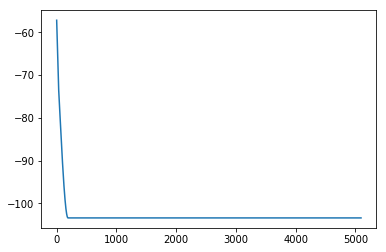

In [42]:
plot([x['pe']/x['atoms'] for x in fe_reaxff_calc.thermo_content])
draw()

# Testing with Slabs

## Creating the simulation particles

In [30]:
Fe_slab = bcc110('Fe', size=(1,1,10), vacuum=10.0)
view(Fe_slab)

## Setting simulation parameters

In [5]:
fe_slab_lammps_params = {
    # Initialization
    "units": "metal",
    "atom_style": "atomic",
    
    # Forcefield definition
    "pair_style": "eam/alloy",
    "pair_coeff": ['* * ' + 'Fe_mm.eam.fs' + ' Fe'],
    "neighbor": "2.0 bin",
    "neighbor_modify": "delay 10 check yes",
    
    # Run and Minimization
    "timestep": 0.1,
    "minimize": "1e-25 1e-25 5000 10000",
    "min_style": "cg",
    "fix": ["1 all box/relax xy 0.0 vmax 0.001"]
}
fe_slab_calc = LAMMPS(tmp_dir = homepath + "temp", 
                      parameters = fe_slab_lammps_params,
                      keep_tmp_files=True, no_data_file=True)
Fe_slab.set_calculator(fe_slab_calc)
fe_slab_calc.atoms = Fe_slab.copy()
fe_slab_calc.prism = Prism(fe_slab_calc.atoms.get_cell())

## Writing input file

In [15]:
fe_slab_calc.write_lammps_in(lammps_in = homepath + "input\\fe_slab_eam_minimize.in",
                             lammps_trj = homepath + "output\\fe_slab_eam_minimize.lammpstrj")

## Running calculations

In [ ]:
!lmp_serial -in input\fe_slab_eam_minimize.in -log output\fe_slab_eam_minimize.log

## Reading output

In [6]:
fe_slab_calc.read_lammps_log(lammps_log = homepath + "output\\fe_slab_eam_minimize.log")

In [24]:
with open(homepath + "output\\fe_slab_eam_minimize.traj", mode = 'w') as traj:
    fe_slab_calc.trajectory_out = Trajectory(homepath + "output\\fe_slab_eam_minimize.trj", 'w')
    fe_slab_calc.read_lammps_trj(lammps_trj = homepath + "output\\fe_slab_eam_minimize.lammpstrj")
    
fe_slab_traj = Trajectory(homepath + "output\\fe_slab_eam_minimize.trj")

In [28]:
view(fe_slab_traj, viewer='ngl')

In [19]:
fe_slab_calc.thermo_content[-1]

{'step': 65.0,
 'temp': 0.0,
 'press': -15871.152,
 'cpu': 0.61554193,
 'pxx': -26719.439,
 'pyy': -20894.018,
 'pzz': -5.1327635e-07,
 'pxy': -1.9933941e-07,
 'pxz': -3.2129194e-07,
 'pyz': -8.6113672e-10,
 'ke': 0.0,
 'pe': -40.026937,
 'etotal': -40.026937,
 'vol': 106.42414,
 'lx': 2.87,
 'ly': 2.0293965,
 'lz': 18.272221,
 'atoms': 10.0}

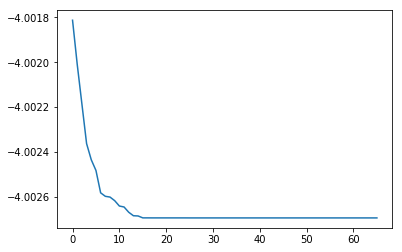

In [36]:
plot([x['pe']/x['atoms'] for x in fe_slab_calc.thermo_content])
draw()

# Running slab calculation with various thickness and vacuum gap

In [94]:
# ref https://www.sciencedirect.com/science/article/pii/S0375960117310605

Fe_var_thermo_contents = []
Fe_var_thermo_contents_label = []
for thickness in range(2, 60, 4):
    Fe_var_thermo_contents_label.append(thickness)
    Fe_var_slab = bcc110('Fe', size=(1,1,thickness), vacuum=10.0)
    
    Fe_var_slab_calc = LAMMPS(tmp_dir = homepath + "temp", 
                              parameters = fe_slab_lammps_params,
                              keep_tmp_files=True, no_data_file=True)
    
    Fe_slab.set_calculator(Fe_var_slab_calc)
    Fe_var_slab_calc.atoms = Fe_var_slab.copy()
    Fe_var_slab_calc.prism = Prism(Fe_var_slab_calc.atoms.get_cell())
    
    Fe_var_slab_calc.write_lammps_in(lammps_in = homepath + "input\\fe_var_slab_eam_minimize.in",
                                     lammps_trj = homepath + "output\\fe_var_slab_eam_minimize.lammpstrj")
    
    !lmp_serial -in input\fe_var_slab_eam_minimize.in -log output\fe_var_slab_eam_minimize.log
    
    Fe_var_slab_calc.read_lammps_log(lammps_log = homepath + "output\\fe_var_slab_eam_minimize.log")
    Fe_var_thermo_contents.append(Fe_var_slab_calc.thermo_content)

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 22.0294) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0.000496149 secs
Created 1 atoms
  Time spent = 0 secs
Reading potential file Fe_mm.eam.fs with DATE: 2007-06-11
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.3
  ghost atom cutoff = 7.3
  binsize = 3.65, bins = 2 1 7
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/newton/tri
      stencil: half/bin/3d/newton/tri
      bin: standard
Setting up cg style

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 38.2646) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Reading potential file Fe_mm.eam.fs with DATE: 2007-06-11
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.3

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 46.3822) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Reading potential file Fe_mm.eam.fs with DATE: 2007-06-11
N

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 54.4997) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000499964 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 62.6173) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 70.7349) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000496149 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 78.8525) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.00049305 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 at

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 86.9701) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000496864 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 95.0877) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000993013 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 103.205) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000495911 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 111.323) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 119.44) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 at

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 127.558) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Tim

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 135.676) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000495911 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

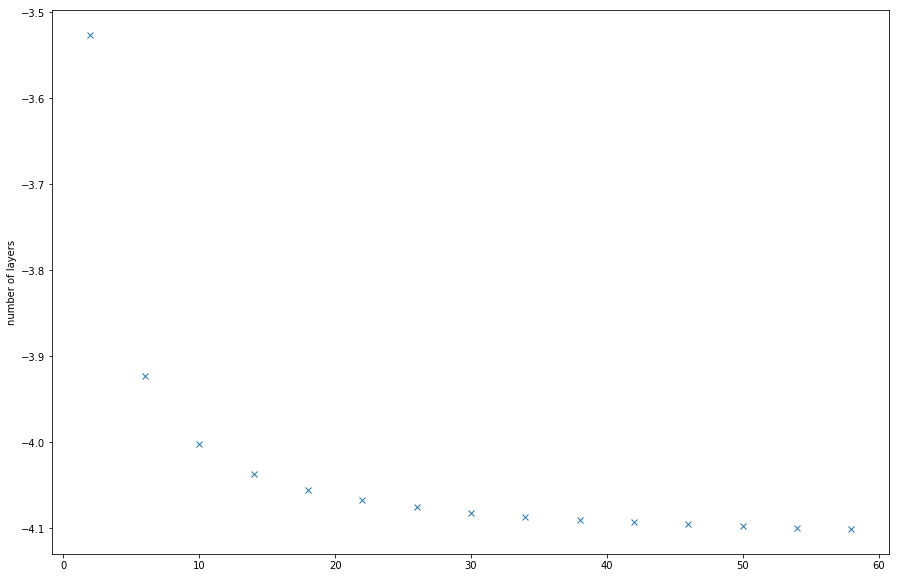

In [95]:
figure(figsize=(15, 10))
Fe_var_eam_pe = [x[-1]['pe']/x[-1]['atoms'] for x in Fe_var_thermo_contents]

plot(Fe_var_thermo_contents_label, Fe_var_eam_pe, ' x')
ylabel("number of layers")

draw()

# Repeating the above with ReaxFF

In [96]:
Fe_slab_reaxff_params = {
    # Initialization
    "units": "real",
    "atom_style": "charge",
    "mass": ["1 55.845"],
    
    # Forcefield definition
    "pair_style": "reax/c NULL safezone 16",
    "pair_coeff": ['* * ' + 'ffield.reax.Fe_O_C_H' + ' Fe'],
    "neighbor": "2.0 bin",
    "neighbor_modify": "delay 10 check yes",
    
    # Run and Minimization
    "minimize": "1e-25 1e-25 10000 10000",
    "min_style": "cg",
    "timestep": 0.1,
    "fix": ["1 all box/relax xy 0.0 vmax 0.001",
            "2 all qeq/reax 1 0.0 10.0 1e-6 reax/c"]
}

In [101]:
# ref https://www.sciencedirect.com/science/article/pii/S0375960117310605

Fe_var_reaxff_thermo_contents = []
Fe_var_reaxff_thermo_contents_label = []

for thickness in range(2, 60, 4):
    Fe_var_reaxff_thermo_contents_label.append(thickness)
    Fe_var_reaxff_slab = bcc110('Fe', size=(1,1,thickness), vacuum=10.0)
    
    Fe_var_reaxff_slab_calc = LAMMPS(tmp_dir = homepath + "temp", 
                              parameters = fe_slab_lammps_params,
                              keep_tmp_files=True, no_data_file=True)
    
    Fe_slab.set_calculator(Fe_var_reaxff_slab_calc)
    Fe_var_reaxff_slab_calc.atoms = Fe_var_reaxff_slab.copy()
    Fe_var_reaxff_slab_calc.prism = Prism(Fe_var_reaxff_slab_calc.atoms.get_cell())
    
    Fe_var_reaxff_slab_calc.write_lammps_in(lammps_in = homepath + "input\\fe_var_slab_reaxff_minimize.in",
                                     lammps_trj = homepath + "output\\fe_var_slab_reaxff_minimize.lammpstrj")
    
    !lmp_serial -in input\fe_var_slab_reaxff_minimize.in -log output\fe_var_slab_reaxff_minimize.log
    
    Fe_var_reaxff_slab_calc.read_lammps_log(lammps_log = homepath + "output\\fe_var_slab_reaxff_minimize.log")
    Fe_var_reaxff_thermo_contents.append(Fe_var_reaxff_slab_calc.thermo_content)

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 22.0294) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Reading potential file Fe_mm.eam.fs with DATE: 2007-06-11
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.3
  ghost atom cutoff = 7.3
  binsize = 3.65, bins = 2 1 7
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attributes: half, newton on
      pair build: half/bin/newton/tri
      stencil: half/bin/3d/newton/tri
      bin: standard
Setting up cg style minimizat

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 38.2646) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Reading potential file Fe_mm.eam.fs with DATE: 2007-06-11
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.3

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 46.3822) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000495911 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Reading potential file Fe_mm.eam.fs with DATE: 20

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 54.4997) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000496149 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 62.6173) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000496149 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 70.7349) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 78.8525) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 86.9701) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 95.0877) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000496864 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 103.205) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 111.323) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000492811 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 119.44) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000494957 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 at

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 127.558) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000496149 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

LAMMPS (16 Aug 2018)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:87)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1 1 1
Created triclinic box = (0 0 0) to (2.87 2.0294 135.676) with tilt (-1.435 0 0)
  1 by 1 by 1 MPI processor grid
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0.000495911 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 atoms
  Time spent = 0 secs
Created 1 a

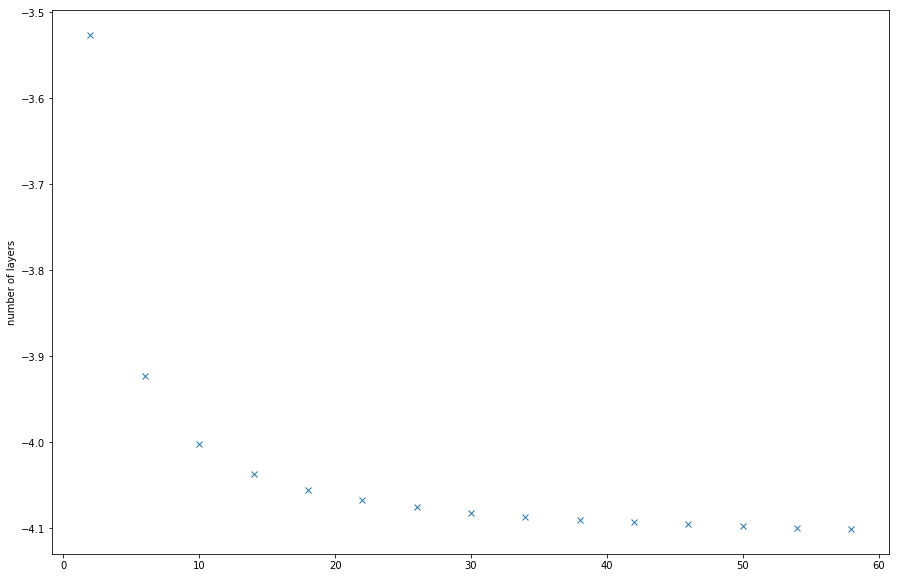

In [102]:
figure(figsize=(15, 10))
Fe_var_reaxff_pe = [x[-1]['pe']/x[-1]['atoms'] for x in Fe_var_reaxff_thermo_contents]

plot(Fe_var_reaxff_thermo_contents_label, Fe_var_reaxff_pe, ' x')
ylabel("number of layers")

draw()